In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset to inspect its structure and content
file_path = 'forecast_history - forecast_history.csv'
forecast_data = pd.read_csv(file_path)

In [2]:
# Display the first few rows of the dataset
forecast_data.head()

# process and clean the data for analysis

# Remove the '%' sign and convert the forecast columns to numerical format
forecast_data['Westpac: 4 year forecast'] = (
    forecast_data['Westpac: 4 year forecast'].str.replace('%', '').astype(float)
)
forecast_data['Joe Bloggs: 2 year forecast'] = (
    forecast_data['Joe Bloggs: 2 year forecast'].str.replace('%', '').astype(float)
)
forecast_data['Harry Spent: 5 year forecast'] = (
    forecast_data['Harry Spent: 5 year forecast'].str.replace('%', '').astype(float)
)



In [3]:
# Calculate the actual future median house prices for each forecasted year based on percentage changes
# Assuming that the percentage indicates a growth from the year of forecast
forecast_data['Westpac_actual'] = forecast_data['Median house price'] * (1 + forecast_data['Westpac: 4 year forecast'] / 100)
forecast_data['JoeBloggs_actual'] = forecast_data['Median house price'] * (1 + forecast_data['Joe Bloggs: 2 year forecast'] / 100)
forecast_data['HarrySpent_actual'] = forecast_data['Median house price'] * (1 + forecast_data['Harry Spent: 5 year forecast'] / 100)

In [4]:
# prepare data to visualize how these forecasts differ from each other
forecast_comparison = forecast_data[['Unnamed: 0', 'Median house price', 'Westpac_actual', 'JoeBloggs_actual', 'HarrySpent_actual']]

# Display the transformed and comparison-ready data
forecast_comparison

# Visualizing the comparison of actual forecasts against median house prices over time
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

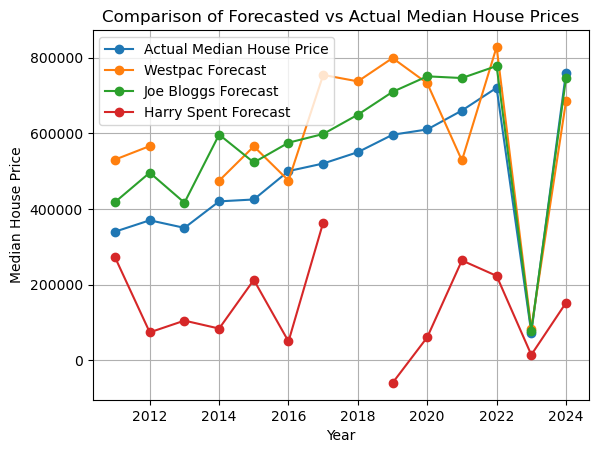

In [7]:
# Plot for each forecaster
plt.plot(forecast_comparison['Unnamed: 0'], forecast_comparison['Median house price'], label='Actual Median House Price', marker='o')
plt.plot(forecast_comparison['Unnamed: 0'], forecast_comparison['Westpac_actual'], label='Westpac Forecast', marker='o')
plt.plot(forecast_comparison['Unnamed: 0'], forecast_comparison['JoeBloggs_actual'], label='Joe Bloggs Forecast', marker='o')
plt.plot(forecast_comparison['Unnamed: 0'], forecast_comparison['HarrySpent_actual'], label='Harry Spent Forecast', marker='o')


# Adding labels and title
plt.title('Comparison of Forecasted vs Actual Median House Prices')
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
